# Naïve Bayes Classifier 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import math
import random

# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree

In [2]:
# Load density data

MMS2_n = pd.read_csv('MMS2_n.csv',
                     header = 0,names = ['times','n','date'],
                     parse_dates=['date'])


# load temperature data
MMS2_Tperp = pd.read_csv('MMS2_Tperp.csv',
                     header = 0,names = ['times','Tperp','date'],
                     parse_dates=['date'])

MMS2_Tpara = pd.read_csv('MMS2_Tpara.csv',
                     header = 0,names = ['times','Tpara','date'],
                     parse_dates=['date'])


MMS2_n

times          n                          date
0       1.592421e+09   0.384797 2020-06-17 19:17:13.094996992
1       1.592421e+09   0.390098 2020-06-17 19:17:13.244997120
2       1.592421e+09   0.400450 2020-06-17 19:17:13.394996992
3       1.592421e+09   0.377668 2020-06-17 19:17:13.544997120
4       1.592421e+09   0.395304 2020-06-17 19:17:13.694996992
...              ...        ...                           ...
134580  1.592452e+09  13.960220 2020-06-18 03:41:32.274036992
134581  1.592452e+09  13.939400 2020-06-18 03:41:32.424037120
134582  1.592452e+09  14.419994 2020-06-18 03:41:32.574036992
134583  1.592452e+09  14.073477 2020-06-18 03:41:32.724037120
134584  1.592452e+09  14.045006 2020-06-18 03:41:32.874036992

[134585 rows x 3 columns]

## Data Processing

In [3]:
# Magnteosphere time periods were identified by eye. 
# Find matching indices to classify density data set into being either 1 magnetosphere, or 0 not magnetosphere


# Identified magnetosphere time periods





DT_st_time = '2020-06-17/20:30:00'

DT_end_time = '2020-06-17/23:00:53'

DT_st_idx = MMS2_n.date.searchsorted(DT_st_time)
DT_end_idx = MMS2_n.date.searchsorted(DT_end_time)

# def MSP_classification(density_arr, )








print(DT_st_idx)

print(DT_end_idx)





645
60995


### We will have 60,350 data points that are classified as either 1 (yes we're in Magnetosphere) or 0 (no we are not in the Magnetosphere)

In [4]:



# create an array the length of the classified data, fill with 0's
MSP = np.zeros(len(MMS2_n.date))






Magnetosphere_st_stop_times = ['2020-06-17/20:30:00','2020-06-17/21:16:31',
'2020-06-17/21:32:41','2020-06-17/21:35:30',
'2020-06-17/21:38:54','2020-06-17/21:41:40', 
'2020-06-17/21:49:00','2020-06-17/21:53:39',
'2020-06-17/21:56:49','2020-06-17/22:00:36',
'2020-06-17/22:04:52','2020-06-17/22:10:44',
'2020-06-17/22:13:28', '2020-06-17/22:16:47',
'2020-06-17/22:20:06','2020-06-17/22:23:55',
'2020-06-17/22:27:45','2020-06-17/22:30:56',
'2020-06-17/22:34:34','2020-06-17/22:37:37',
'2020-06-17/22:39:17','2020-06-17/22:43:45',
'2020-06-17/22:46:41','2020-06-17/22:49:33',
'2020-06-17/22:55:59','2020-06-17/23:00:53']


# too lazy to reformat the original list, so specify that start times are every other 
# element starting at 0th index, end times are every other index starting at 1st index

st_times = Magnetosphere_st_stop_times[::2]
end_times = Magnetosphere_st_stop_times[1::2]

for t in range(len(st_times)):
    st_idx_1 = MMS2_n.date.searchsorted(st_times[t])
    print('start index:',st_idx_1)
    end_idx_1 = MMS2_n.date.searchsorted(end_times[t])
    print('end index:',end_idx_1)
    MSP[st_idx_1:end_idx_1] = 1
    print('\n')
    

    

# save to a .csv so I can visually inspect the result
#pd.DataFrame(MSP).to_csv('MSP_classifier.csv', index=False) 


start index: 645
end index: 19251


start index: 25718
end index: 26844


start index: 28204
end index: 29311


start index: 32244
end index: 34104


start index: 35371
end index: 36884


start index: 38591
end index: 40938


start index: 42031
end index: 43358


start index: 44683
end index: 46210


start index: 47743
end index: 49016


start index: 50470
end index: 51690


start index: 52356
end index: 54143


start index: 55316
end index: 56463


start index: 59035
end index: 60995




In [5]:
# Check to make sure there are 0's and 1's where you want them
print(MSP[26843:28205])

[1. 0. 0. ... 0. 0. 1.]


In [6]:
#DT_n_DF = MMS2_n.iloc[DT_st_idx:DT_end_idx]


n = np.array(MMS2_n.n[DT_st_idx:DT_end_idx])


print(n)

# DT_n_DF['MSP_classifier'] = MSP[DT_st_idx:DT_end_idx]

DT_DF = pd.DataFrame(data = {"times": MMS2_n.times[DT_st_idx:DT_end_idx],
                             "n": MMS2_n.n[DT_st_idx:DT_end_idx],
                             "Tpara": MMS2_Tpara.Tpara[DT_st_idx:DT_end_idx],
                            "Tperp": MMS2_Tperp.Tperp[DT_st_idx:DT_end_idx],
                            "MSP":MSP[DT_st_idx:DT_end_idx]})



DT_DF


[0.989079  0.9637257 0.9444995 ... 1.0501395 1.0778915 1.1071372]


times         n      Tpara      Tperp  MSP
645    1.592426e+09  0.989079  525.85547  499.37415  1.0
646    1.592426e+09  0.963726  504.76862  515.45215  1.0
647    1.592426e+09  0.944500  487.18292  479.80856  1.0
648    1.592426e+09  0.953222  581.82440  515.65250  1.0
649    1.592426e+09  0.978770  516.98810  498.97446  1.0
...             ...       ...        ...        ...  ...
60990  1.592435e+09  1.109043  396.39496  422.18692  1.0
60991  1.592435e+09  1.100456  392.12500  423.97350  1.0
60992  1.592435e+09  1.050140  374.55520  437.87630  1.0
60993  1.592435e+09  1.077892  323.79974  385.11502  1.0
60994  1.592435e+09  1.107137  389.47522  475.59442  1.0

[60350 rows x 5 columns]

In [7]:
X = DT_DF.drop(['MSP'], axis=1)



y = DT_DF['MSP']

## Split Data

In [8]:
# split X and y into training and testing sets




from sklearn.model_selection import train_test_split

# train on 70% of data, test on 30%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [9]:
X_train.shape, X_test.shape

((42245, 4), (18105, 4))

## Feature Scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler


# have to use MinMax because I was getting errors for having negative numbers
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


# Create new data frames from the scaled data
X_train = pd.DataFrame(X_train, columns = ['times','n','Tpara','Tperp'])

X_test = pd.DataFrame(X_test, columns = ['times','n','Tpara','Tperp'])

# make sure it looks right
X_train.head()



# Create Decision Tree classifer object
entropy_DT = DecisionTreeClassifier(criterion='entropy') 

# Train Decision Tree Classifer
entropy_DT = entropy_DT.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_entropy = entropy_DT.predict(X_test)

print("Accuracy for entropy criterion:",metrics.accuracy_score(y_test, y_pred_entropy))

# Create Decision Tree classifer object
gini_DT = tree.DecisionTreeClassifier(criterion='gini') 

# Train Decision Tree Classifer
gini_DT = gini_DT.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_gini = gini_DT.predict(X_test)
print("Accuracy for gini criterion:",metrics.accuracy_score(y_test, y_pred_gini))

Accuracy for entropy criterion: 0.9976249654791494
Accuracy for gini criterion: 0.9956365644849489


 ### Train the model

In [11]:
# Model Accuracy, how often is the classifier correct?




### Visualize the Decision Tree

In [12]:
# Using graphviz and pydotplus to visualize DT. Note these packages must be installed prior. 





from sklearn.tree import export_graphviz
import six 
import sys
sys.modules['sklearn.externals.six']= six


import os


from six import StringIO
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus




features = ['times','n','Tpara','Tperp']

# model = tree.DecisionTreeClassifier(criterion='gini') 
# model.fit(X_train,y_train)
# model.score(X_train,y_train)
# predicted= model.predict(X_test)


from io import StringIO
dot_data = StringIO() 
#tree.export_graphviz(model, out_file=dot_data) 


tree.export_graphviz(gini_DT, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features, class_names=['Not MSP','MSP'])

gini_DT_graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# gini_DT_graph.write_png('Magnetosphere_times_DT_GINI.png')
# Image(gini_DT_graph.create_png())









# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True,feature_names = features,class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('Magnetosphere_times.png')
# Image(graph.create_png())

In [13]:
dot_data = StringIO() 
#tree.export_graphviz(model, out_file=dot_data) 


tree.export_graphviz(entropy_DT, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features, class_names=['Not MSP','MSP'])

entropy_DT_graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# entropy_DT_graph.write_png('Magnetosphere_times_DT_entropy.png')
# Image(entropy_DT_graph.create_png())

In [17]:


X_2 = DT_DF.drop(['MSP'], axis=1)

# test to see if accuracy goes down when excluding time as a feature
X_2 = X_2.drop(['times'], axis=1)

print( X_2)

y_2 = DT_DF['MSP']

# create a DT with a specified max depth
X_train, X_test, y_train, y_test = train_test_split(X_2,y_2, test_size = 0.3, random_state = 0)




# Create Decision Tree classifer object
entropy_DT_2 = DecisionTreeClassifier(criterion='entropy') 

# Train Decision Tree Classifer
entropy_DT_2 = entropy_DT_2.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_entropy_2 = entropy_DT_2.predict(X_test)

print("Accuracy for entropy criterion with max depth {}:".format(max_depth),
      "%0.3f" %metrics.accuracy_score(y_test, y_pred_entropy_2))



# for max_depth in range(1,20):
#     # Create Decision Tree classifer object
#     entropy_DT_2 = DecisionTreeClassifier(criterion='entropy',max_depth = max_depth) 

#     # Train Decision Tree Classifer
#     entropy_DT_2 = entropy_DT_2.fit(X_train,y_train)

#     #Predict the response for test dataset
#     y_pred_entropy_2 = entropy_DT_2.predict(X_test)

#     print("Accuracy for entropy criterion with max depth {}:".format(max_depth),
#           "%0.3f" %metrics.accuracy_score(y_test, y_pred_entropy_2))





              n      Tpara      Tperp
645    0.989079  525.85547  499.37415
646    0.963726  504.76862  515.45215
647    0.944500  487.18292  479.80856
648    0.953222  581.82440  515.65250
649    0.978770  516.98810  498.97446
...         ...        ...        ...
60990  1.109043  396.39496  422.18692
60991  1.100456  392.12500  423.97350
60992  1.050140  374.55520  437.87630
60993  1.077892  323.79974  385.11502
60994  1.107137  389.47522  475.59442

[60350 rows x 3 columns]
Accuracy for entropy criterion with max depth 20: 0.817


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.208957 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.208957 to fit



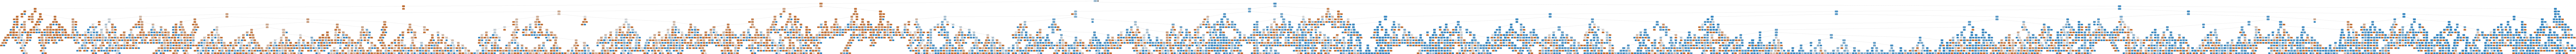

In [18]:
dot_data = StringIO() 
#tree.export_graphviz(model, out_file=dot_data) 

features1 = ['n','Tpara','Tperp']

tree.export_graphviz(entropy_DT_2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features1, class_names=['Not MSP','MSP'])

entropy_DT_graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
entropy_DT_graph.write_png('Magnetosphere_times_DT_entropy_no_time.png')
Image(entropy_DT_graph.create_png())